### 1(a)

Given,
\begin{align*}
J(\theta) = - \frac{1}{m}\sum_{k=1}^m \mathrm{log}(h_{\theta}(y^{(k)}x^{(k)})),
\end{align*}
\begin{align*}
h_{\theta}(x) = g(\theta^Tx), 
\end{align*}
\begin{align*}
g(z) = \frac{1}{1 + e^{-z}}
\end{align*}

for one data point,
\begin{align*}
J(\theta) = - \mathrm{log}(\frac{1}{1 + e^{-y\theta^Tx}})\\
\end{align*}
\begin{align*}
\frac{\partial J}{\partial \theta_{i}} = -(1 + e^{-y\theta^Tx}) (-1) \frac{1}{(1 + e^{-y\theta^Tx})^2} (e^{-y\theta^Tx}) (-yx_{i})\\
= (1 - \frac{1}{1 + e^{-y\theta^Tx}}) (-yx_{i}) = (g(z) - 1)  yx_{i}
\end{align*}

Looks like the second order derivative depends on the derivative of $g(z)$, we want to calculate it first,
\begin{align*}
\frac{\partial g(z)}{\partial z} = \frac{1}{(1 + e^{-z})^2} (e^{-z}) = \frac{1}{(1 + e^{-z})} \frac{e^{-z}}{(1 + e^{-z})} = g(z)(1-g(z))
\end{align*}

therefore,the second order derivative of function $J$ for one data point is
\begin{align*}
\frac{\partial J}{\partial \theta_i\theta_j} =  g(z)(1-g(z))yx_ix_jy
\end{align*}

For m data points, the secord order derivative - the $(i,j)$ element in the Hessian matrix $(H)$ is defined as,
\begin{align*}
\frac{\partial J}{\partial \theta_i\theta_j} =  \frac{1}{m} \sum_{k=1}^m g(z^{(k)}) (1-g(z^{(k)})) y^{(k)}x_i^{(k)}x_j^{(k)}y^{(k)}
\end{align*}

To prove $H$ is positive semi-definite, we need to prove for any vector $z$, $z^THz \ge 0$

\begin{align*}
z^THz = \sum_j\sum_iz_{i}H_{ij}z_{j}  \\
=\sum_j\sum_iz_{i}\frac{1}{m} \sum_{k=1}^m g(z^{(k)}) (1-g(z^{(k)})) y^{(k)}x_i^{(k)}x_j^{(k)}y^{(k)}z_{j} 
\end{align*}
given $y^{(k)} y^{(k)}$ is always equal to 1,

\begin{align*}
=\frac{1}{m} \sum_{k=1}^m g(z^{(k)}) (1-g(z^{(k)})) \sum_j\sum_iz_{i} x_i^{(k)} x_j^{(k)}z_{j} 
\end{align*}

since,
\begin{align*}
\sum_j\sum_iz_{i} x_i^{(k)} x_j^{(k)}z_{j} = (x^Tz)^2 \ge0
\end{align*}
\begin{align*}
0<g(z)<1, 0<1-g(z)<1
\end{align*}
therefore,
$z^THz \ge 0$, H is PSD


### 1(b)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X = pd.read_csv('./data/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('./data/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [4]:
X = np.hstack([np.ones((df_X.shape[0], 1)), df_X])

In [5]:
X.shape

(99, 3)

In [6]:
y = np.array(ys[0])

\begin{align*}
g(z) = \frac{1}{1 + e^{-z}},
\end{align*}

\begin{align*}
\frac{\partial J}{\partial \theta_{i}}
= \frac{1}{m}\sum_{k=1}^{m}(g(z^{(k)}) - 1)  y^{(k)}x_i^{(k)},
\end{align*}

\begin{align*}
\frac{\partial J}{\partial \theta_i\theta_j} =  \frac{1}{m} \sum_{k=1}^m g(z^{(k)}) (1-g(z^{(k)})) x_i^{(k)}x_j^{(k)}
\end{align*}

In [7]:
#initial setup
theta = np.zeros(X.shape[1])
epsilon = 1e-6
dim = X.shape[1]
diff = 20 #initial random number as long as ge epsilon

while diff > epsilon:
    #iterative variables
    print(theta)
    z = y * X.dot(theta)
    gz = 1 / (1 + np.exp(-z))
    #reshape here make a row vector to column vector
    jprime = np.mean((gz - 1).reshape(-1,1) * y.reshape(-1,1) * X, axis = 0)
    H = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            H[i,j] = np.mean(gz.reshape(-1,1) * (1 - gz).reshape(-1,1) * X[:,i].reshape(-1,1) * X[:,j].reshape(-1,1), axis = 0)
    #take iterative variables and feed into Newton's method
    delta = np.linalg.inv(H).dot(jprime)
    theta_old = theta.copy()
    theta -= delta
    #stopping when diff <= epsilon
    diff = np.sum(abs(theta_old - theta))
    

[0. 0. 0.]
[-1.50983811  0.43509696  0.62161752]
[-2.21834632  0.64372727  0.95944716]
[-2.55431051  0.74137714  1.13493588]
[-2.61847133  0.75979248  1.1707512 ]
[-2.62050954  0.76037096  1.17194549]
[-2.6205116   0.76037154  1.17194674]


In [11]:
theta_T = theta.reshape(-1,1)

In [17]:
y_hat = 1 / (1 + np.exp(-X.dot(theta_T)))

In [19]:
y_hat.shape

(99, 1)

In [21]:
X.shape

(99, 3)

### 1(c)

In [26]:
import matplotlib.pyplot as plt

In [23]:
df_X['y'] = ys[0]

In [24]:
df_X.head()

,0,1,y
0,1.343250,-1.331148,-1
1,1.820553,-0.634668,-1
2,0.986321,-1.888576,-1
3,1.944373,-1.635452,-1
4,0.976734,-1.353315,-1


In [42]:
df_X.columns = ['x1','x2','y']

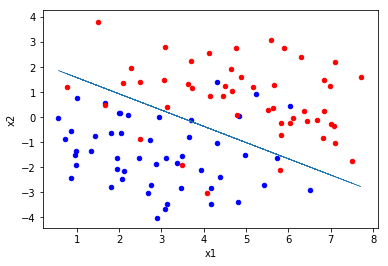

In [43]:
ax = plt.axes()
df_X.query('y == -1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
df_X.query('y == 1').plot.scatter(x='x1', y='x2', ax=ax, color='red')
#condense the 3-d view to 2d
#the y axis now represents x2, and x axis represents x1, color represents y
x1 = X[:,1]
x2 = (theta[0] + theta[1] * x1) / -theta[2]
plt.plot(x1, x2,  lw=0.5)

In [50]:
#y value on the line always equal to 0.5
1/(1+ np.exp(-(theta[0] + theta[1] * x1  +theta[2] * x2)))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])